In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython import display
#from tensorflow.data import Dataset as tfds
from tensorflow.keras.utils import plot_model
import IPython

tf.compat.v1.reset_default_graph()
#import tensorflow.datasets as tfds
%matplotlib inline

In [2]:
#圖片尺寸
img_size = (128, 128)
width = 128

batch_size = 64
latent_dim = 100

In [3]:
#資料集存取路徑
path='/content/animals/'
dog_img_list=[]
cat_img_list=[]
panda_img_list=[]
y_Train = []
y_Test = []
#類別對應編號
dict_label = {"cats":0, "dogs":1, "panda":2}

In [4]:
#load generator and discrimnator
conditional_gen = tf.keras.models.load_model('./generator_330.h5')
conditional_discriminator = tf.keras.models.load_model('./discriminator_330.h5')

In [5]:
conditional_gen.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       300         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 8192)         827392      input_2[0][0]                    
______________________________________________________________________________________________

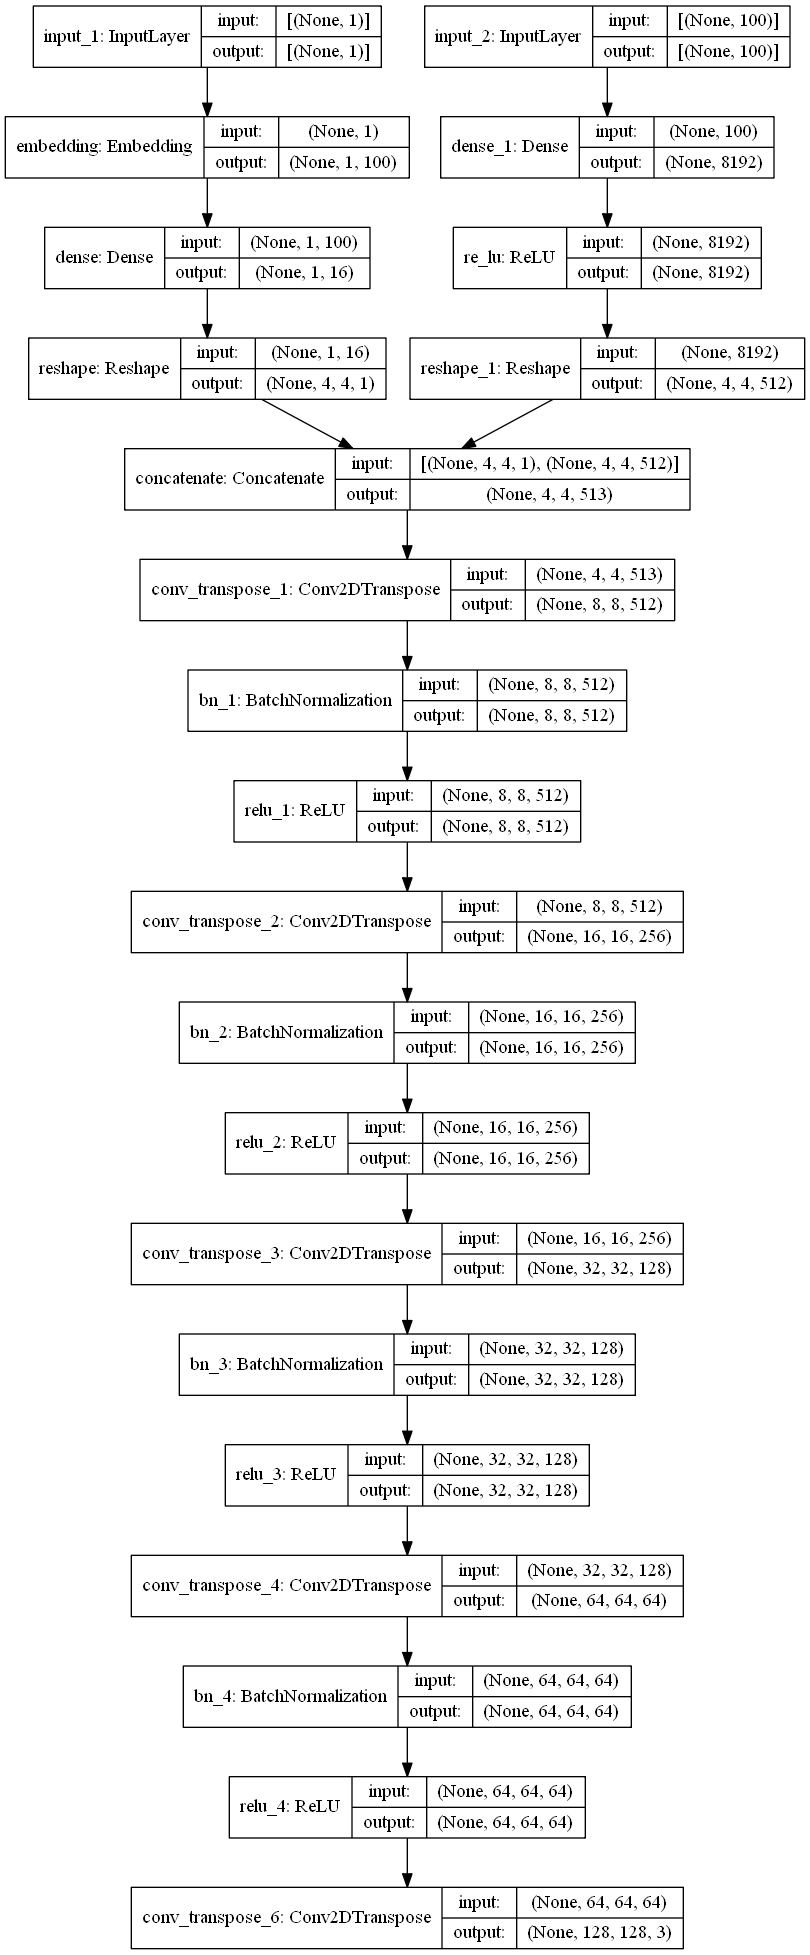

In [6]:
plot_model(conditional_gen, to_file='generator_Model.png', show_shapes=True)

IPython.display.Image('generator_Model.png')

In [7]:
conditional_discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       300         input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1, 49152)     4964352     embedding_1[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
____________________________________________________________________________________________

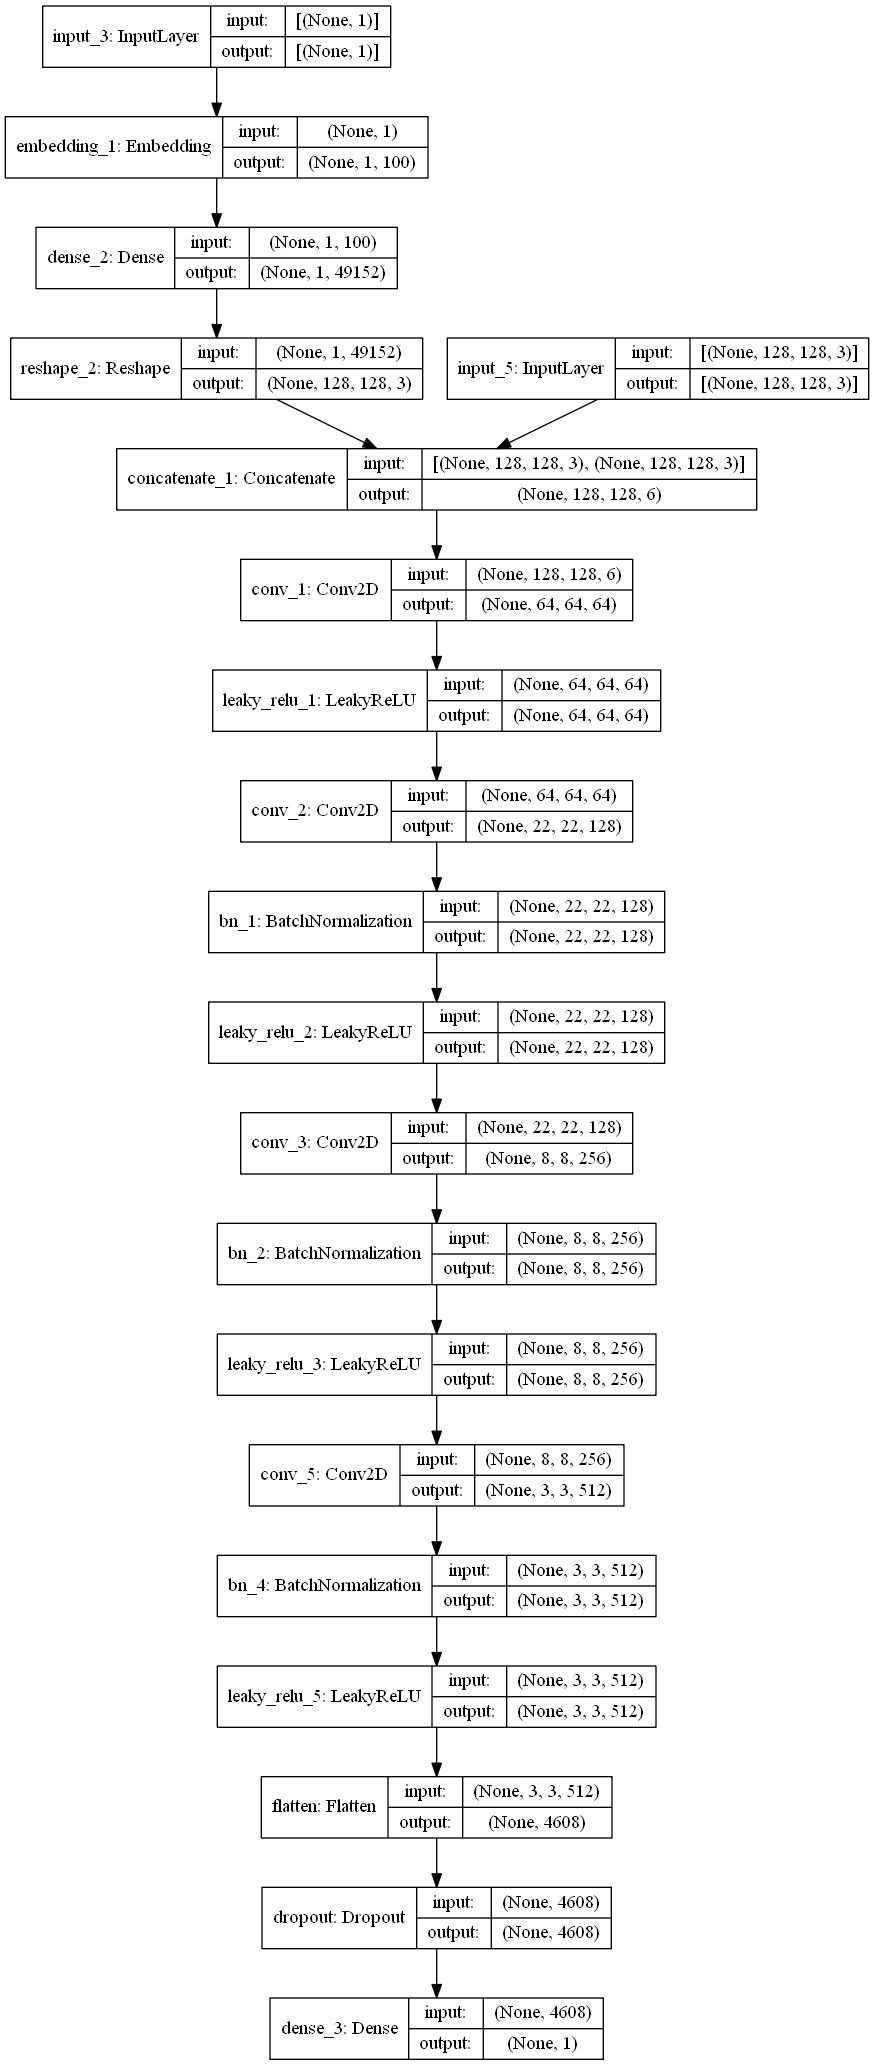

In [8]:
plot_model(conditional_discriminator, to_file='disciminator_Model.png', show_shapes=True)

IPython.display.Image('disciminator_Model.png')

In [9]:
#隨機產產生30張圖片的function
def generate_images():
    #隨機產生noise
    glabels = np.zeros(30)
    for i in range(30):
        if i%10==0:
            glabels[i]=0
        if i%10==1:
            glabels[i]=1
        if i%10==2:
            glabels[i]=2

    #產生圖片
    noise = tf.random.normal([30, latent_dim])
    generated_images = (conditional_gen([glabels,noise]))
    generated_images = (generated_images + 1) / 2

    return generated_images

In [10]:
#印出30張圖片的function
def display_3class(array1, savepath):
    n = 10

    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(array1[i])
        plt.title('cat')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(array1[i+10])
        plt.title('dog')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(array1[i+20])
        plt.title('panda')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.gcf()
    plt.savefig(savepath)    
    plt.show()

In [11]:
generated_images = generate_images()

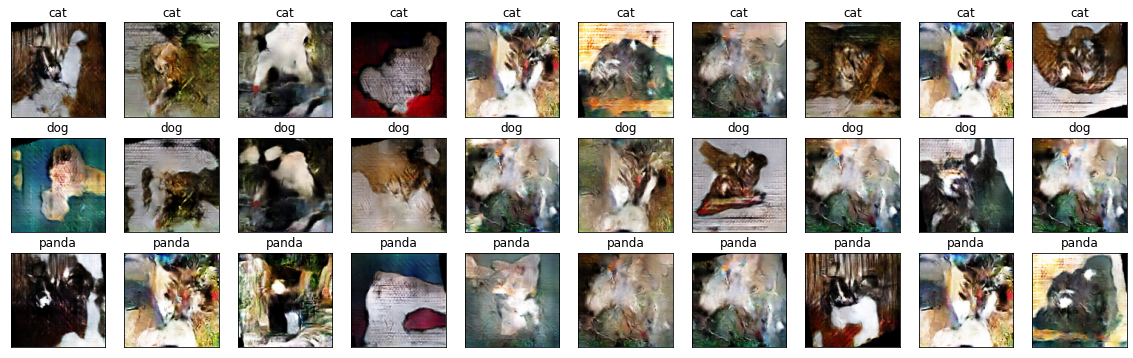

In [12]:
img_savepath = "./animals_generate.jpg"
display_3class(generated_images, img_savepath)